# Introduction
## Objective
### 400 applicants have been surveyed as potential students for UCLA. The university weighs certain aspects of a student's education to determine their acceptance.

### The objective is to explore what kind of data is provided, determine the most important factors that contribute to a student's chance of admission, and select the most accurate model to predict the probability of admission.

# Data Description
## The dataset contains information about a student's:

### GRE Score
### TOEFL Score
### University Ratings
### Statement of Purpose Score
### Letter of Recomendation Score
### CGPA
### Whether the Student Has Done Any Research
### Chance of Admission (What We're Trying to Predict)

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
#import os
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

In [3]:
# IMPORT DATASET 
df = pd.read_csv("C:\\Users\\Kunal\\Downloads\\admission_data.csv")
df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Exploratory Data Analysis (EDA)
## From these charts it looks like we have no missing values!

## It seems as though Serial No. is just an index for students, which we can take out.

## Two columns also have an added space in the label which we'll take out

## We are also removing the blank sapces.

In [7]:
df.rename(columns = {'Chance of Admit ':'Chance of Admit', 'LOR ':'LOR'}, inplace=True)


<Axes: >

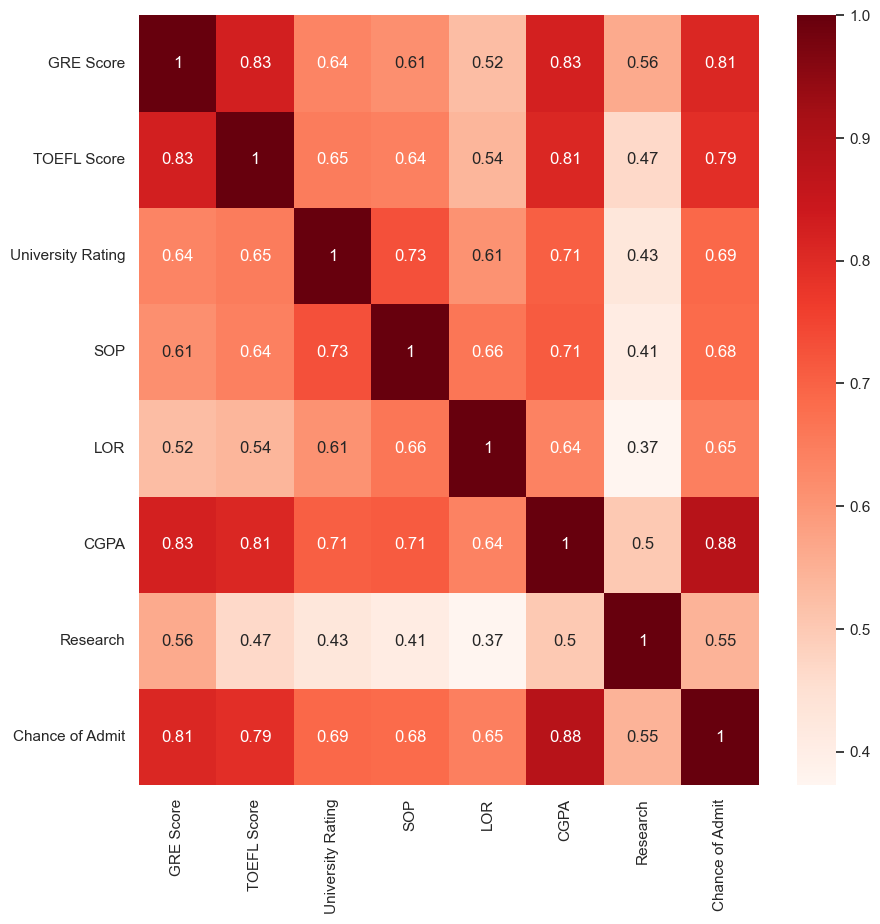

In [8]:
#plot a heatmap to see the correlation of all the features compared to Chance to Admit
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Reds')

C:\Users\Kunal\AppData\Local\Temp\ipykernel_14240\3112773265.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'])


Text(0.5, 1.0, 'CGPA Distribution of Applicants')

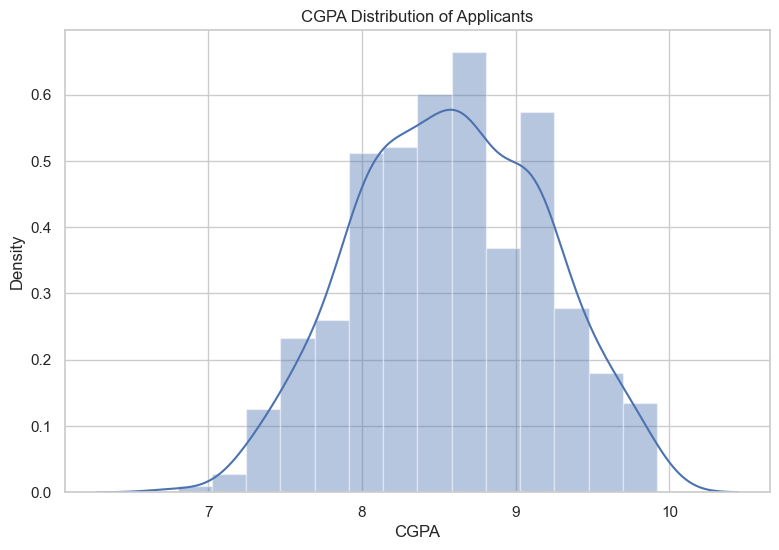

In [6]:
#CGPA vs Chance of Admit
#It appears as applicant's CGPA has a strong correlation with their chance of admission.
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'])
plt.title('CGPA Distribution of Applicants')


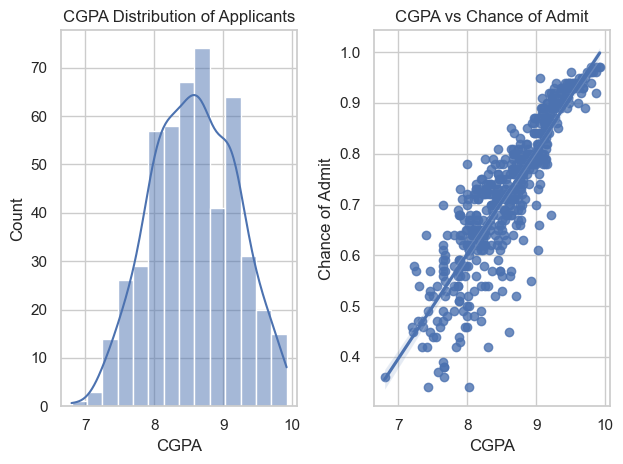

In [7]:

plt.subplot(1, 2, 1)
sns.histplot(df['CGPA'], kde=True)
plt.title('CGPA Distribution of Applicants')

plt.subplot(1, 2, 2)
sns.regplot(x='CGPA', y='Chance of Admit', data=df)
plt.title('CGPA vs Chance of Admit')

plt.tight_layout()
plt.show()

C:\Users\Kunal\AppData\Local\Temp\ipykernel_14240\3967343606.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GRE Score'])


Text(0.5, 1.0, 'GRE Score vs Chance of Admit')

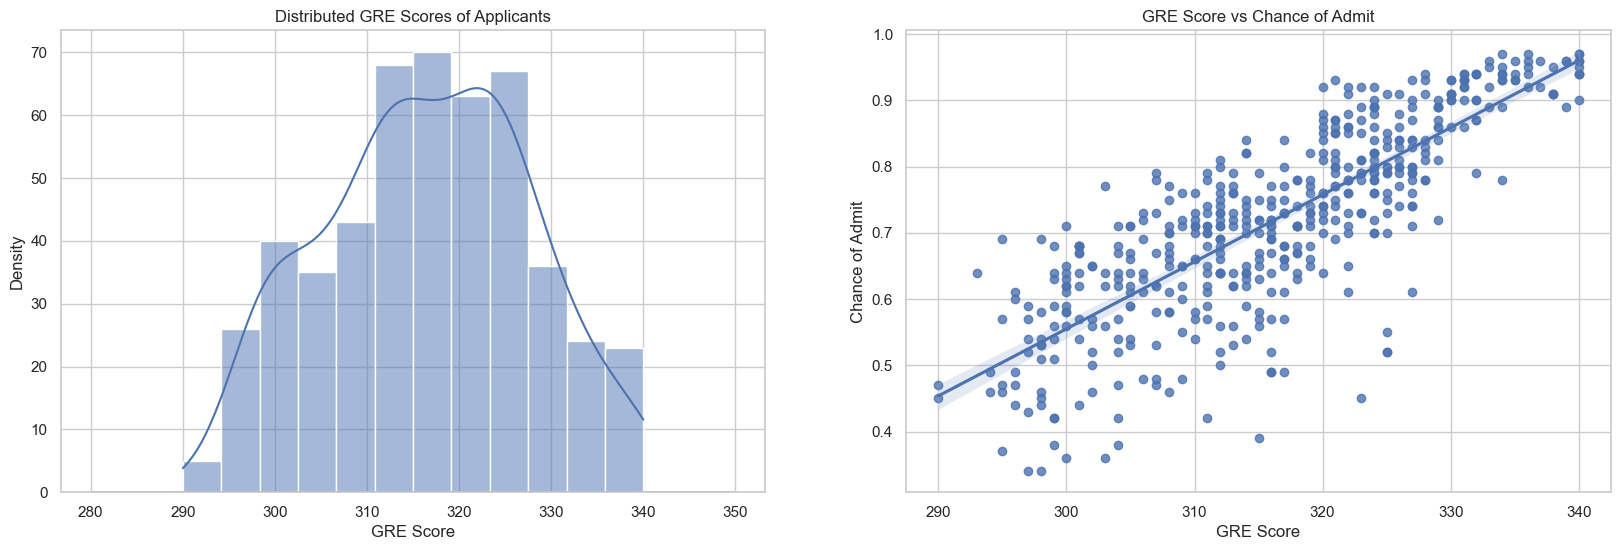

In [8]:
#GRE Score vs Chance of Admit
#GRE scores have a strong correlation with the chance of admission however not as strong as one's CGPA.
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['GRE Score'])
plt.title('Distributed GRE Scores of Applicants')

plt.subplot(1, 2, 1)
sns.histplot(df['GRE Score'], kde=True)
plt.title('Distributed GRE Scores of Applicants')
plt.subplot(1, 2, 2)
sns.regplot(x='GRE Score', y='Chance of Admit', data=df)
plt.title('GRE Score vs Chance of Admit')

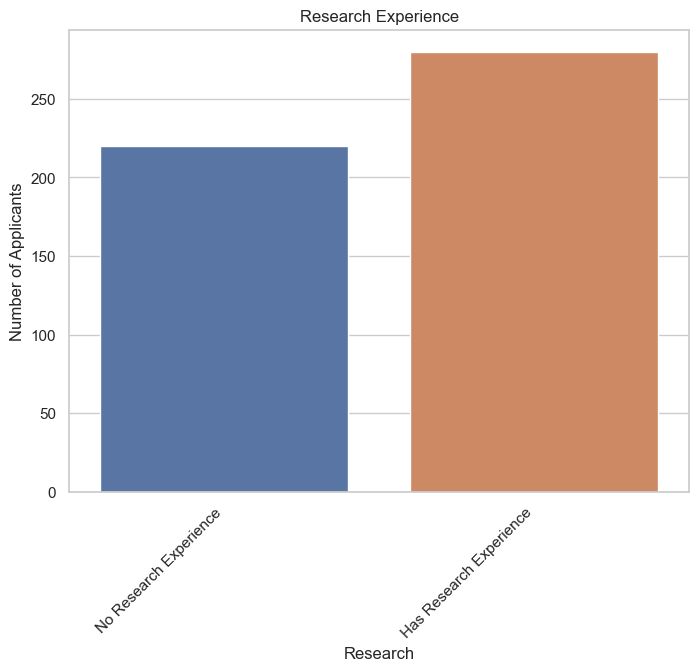

In [9]:
#Research
# Let's explore how many applicants have research experience.

#It seems the majority of applicants have research experience. However, this is the least important feature, 
#so it doesn't matter all too much if an applicant has the experience or not.

fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(x='Research', data=df)  # Replace 'Research Experience' with the correct column name
plt.title('Research Experience')
plt.ylabel('Number of Applicants')
ax.set_xticklabels(['No Research Experience', 'Has Research Experience'], rotation=45, ha='right')

plt.show()

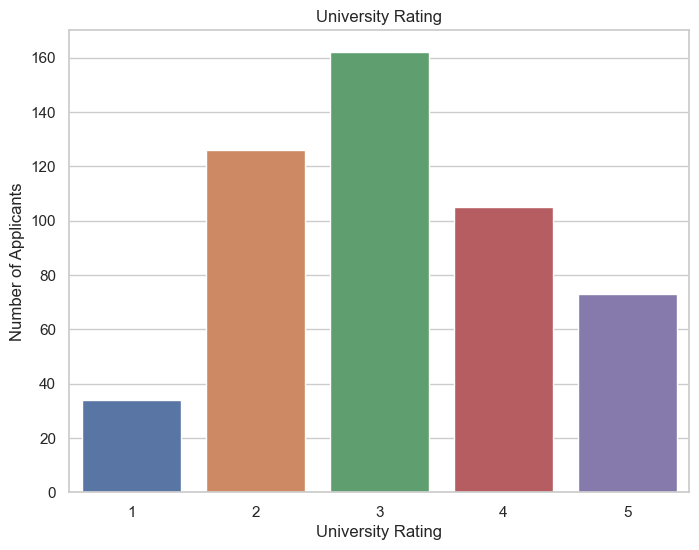

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='University Rating', data=df)  # Replace 'Universit5y rating' with the correct column name
plt.title('University Rating')
plt.ylabel('Number of Applicants')
plt.show()

In [11]:
#Preparing Data for Machine Learning
targets = df['Chance of Admit']
features = df.drop(columns = {'Chance of Admit'})

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Machine Learning 
## Now we'll implement machine learning algorithms to predict the chance of admission. We'll use multiple techniques and eventually select the method with the best score. The methods used will be:

### Linear Regression
### Decision Trees
### Random Forests

## 1) Linear Regression

In [13]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_predict = linreg.predict(X_test)
linreg_score = (linreg.score(X_test, y_test))*100
linreg_score

81.60515841132164

## 2) Decision Trees

In [14]:
dec_tree = DecisionTreeRegressor(random_state=0, max_depth=6)
dec_tree.fit(X_train, y_train)
y_predict = dec_tree.predict(X_test)
dec_tree_score = (dec_tree.score(X_test, y_test))*100
dec_tree_score

72.79978523676513

## 3) Random Forests

In [15]:
forest = RandomForestRegressor(n_estimators=110,max_depth=6,random_state=0)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
forest_score = (forest.score(X_test, y_test))*100
forest_score

79.75303947372548

## Comparing Scores
#### Let's put all the scores in a table and display their scores side-by-side.

Text(0, 0.5, 'Accuracy')

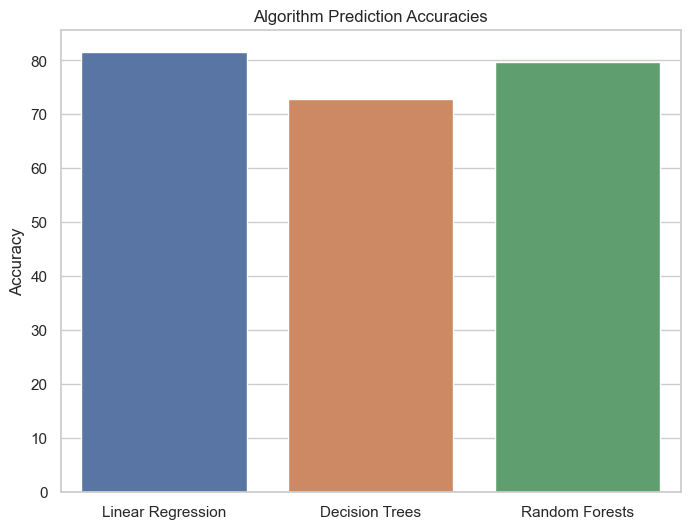

In [16]:
Methods = ['Linear Regression', 'Decision Trees', 'Random Forests']
Scores = np.array([linreg_score, dec_tree_score, forest_score])

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=Methods, y=Scores)
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy')

# Conclusion
## This was a great way to get started on Kaggle and for my first project outside of coursework. It gave me some practice some exploratory analysis and simple machine learning techniques.

## It's great to see what specific variables contribute to the chance of admission and how they are weighted against eachother.